In [ ]:
# Description : This program uses an Artificial recurrent neural network called
# LSTM to predict the closing stock price of a corporation , using the past
# 60 days stock price.

In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
from google.colab import files
uploaded = files.upload()

Saving AAPL(2).csv to AAPL(2).csv


In [ ]:
# Display csv file
df = pd.read_csv("AAPL(2).csv")
print(df.head())
print(df.tail())


         Date       Open       High        Low      Close  Adj Close  \
0  2012-01-03  14.621429  14.732143  14.607143  14.686786  12.557466   
1  2012-01-04  14.642857  14.810000  14.617143  14.765714  12.624949   
2  2012-01-05  14.819643  14.948214  14.738214  14.929643  12.765114   
3  2012-01-06  14.991786  15.098214  14.972143  15.085714  12.898556   
4  2012-01-09  15.196429  15.276786  15.048214  15.061786  12.878098   

      Volume  
0  302220800  
1  260022000  
2  271269600  
3  318292800  
4  394024400  
            Date        Open        High         Low       Close   Adj Close  \
2614  2022-05-23  137.789993  143.259995  137.649994  143.110001  143.110001   
2615  2022-05-24  140.809998  141.970001  137.330002  140.360001  140.360001   
2616  2022-05-25  138.429993  141.789993  138.339996  140.520004  140.520004   
2617  2022-05-26  137.389999  144.339996  137.139999  143.779999  143.779999   
2618  2022-05-27  145.389999  149.679993  145.259995  149.639999  149.639999 

In [ ]:
# # # df.to_csv('AAPL.csv', index = False)
# # # df.head()
# # df.drop("Unnamed: 0",axis = 1)
# df.drop(df.columns[i],axis=1)

In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2619, 7)

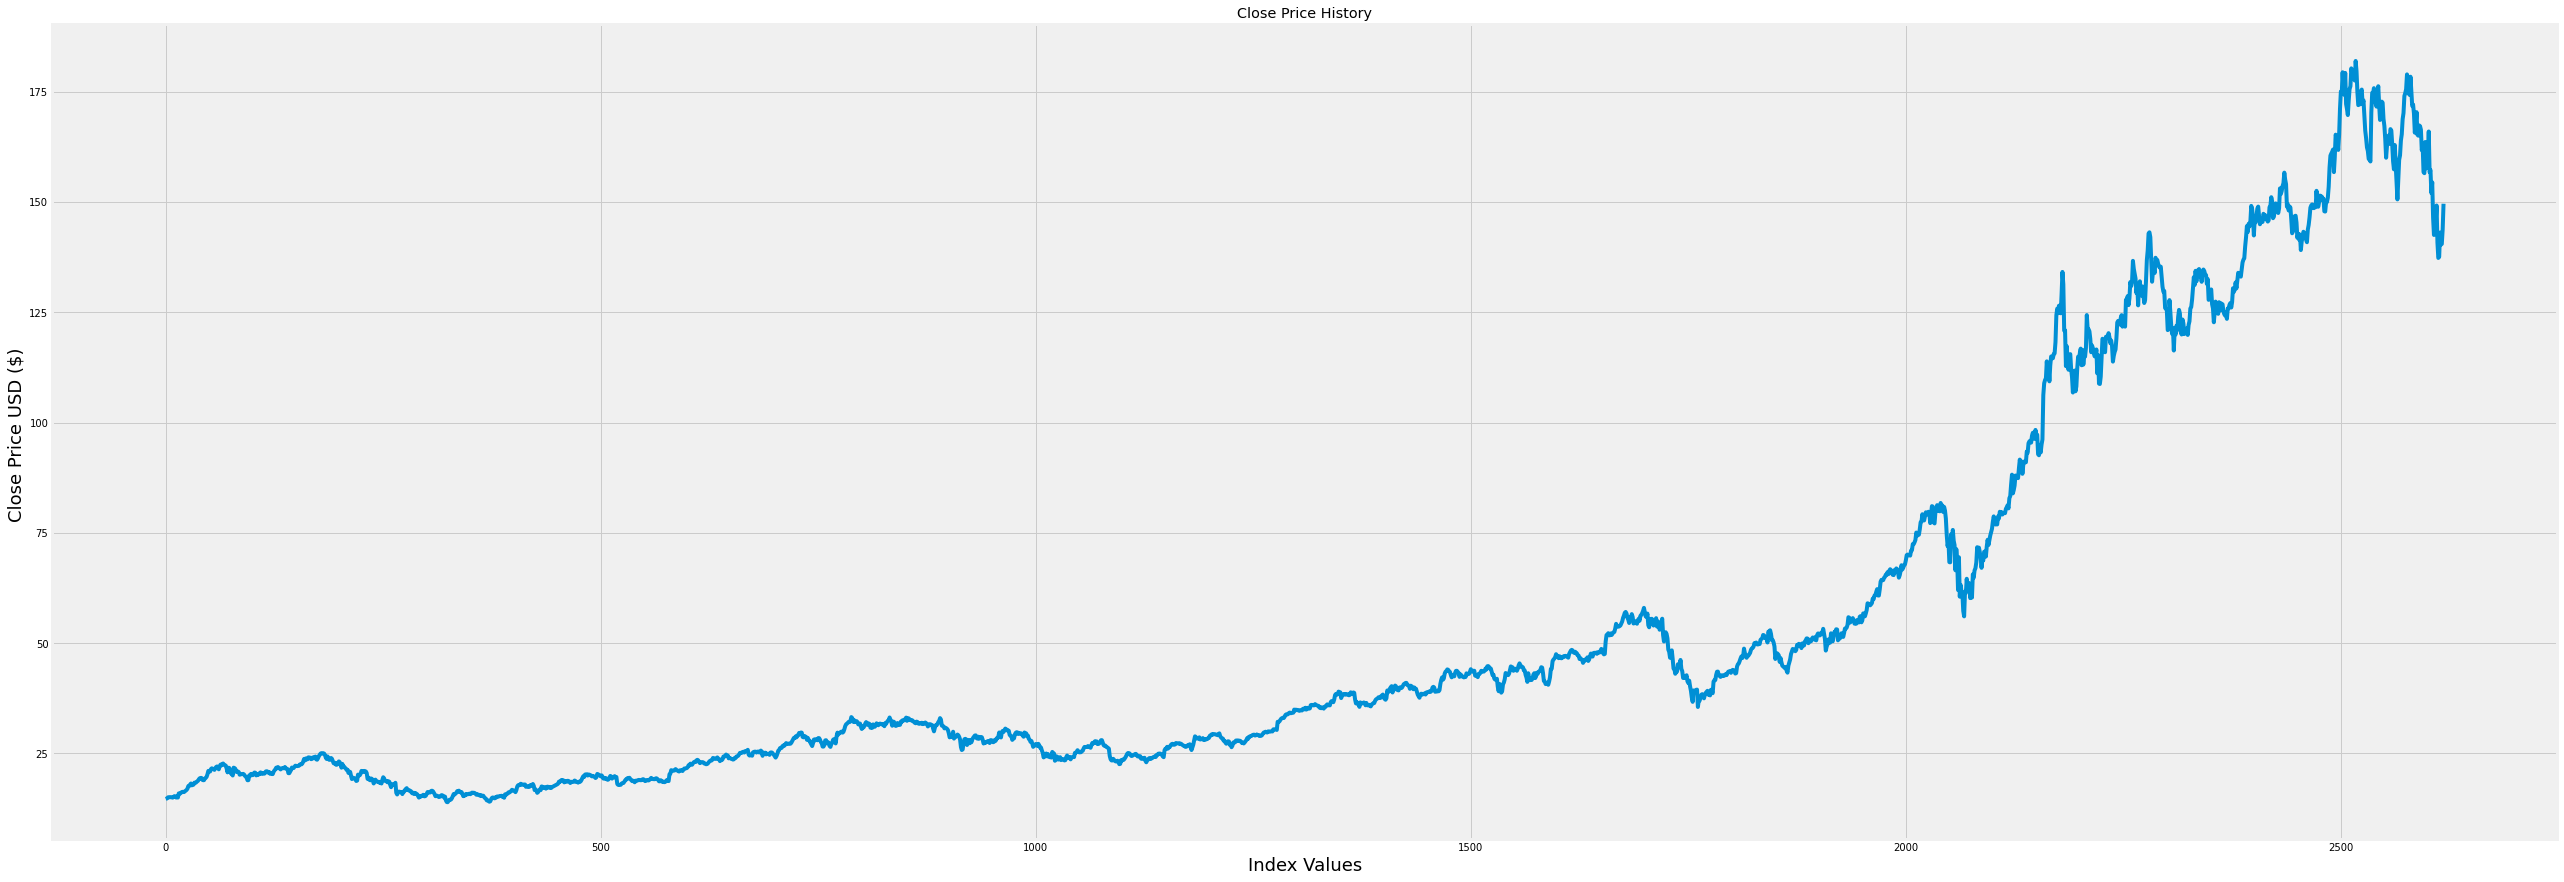

In [ ]:
# Visualise the closing price history
plt.figure(figsize = (40,15))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Index Values',fontsize = 18)
plt.ylabel('Close Price USD ($) ', fontsize = 18)
plt.show()

In [ ]:
# Create a new dataframe with only the "close" column
data = df.filter(['Close'])
# Convert the dataframe to a numPy Array
dataset = data.values
# Get the number of rows to train the model on (80% of the data to be trained)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len # rounded off data value

2096

In [ ]:
# Scale the data
# In practice , it is always good to normalize the input data before
# presenting to a neural network
scaler = MinMaxScaler(feature_range =(0,1) )
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]


array([[0.00439888],
       [0.00486851],
       [0.00584392],
       [0.00677256],
       [0.00663019],
       [0.00695107],
       [0.00680444],
       [0.00655794],
       [0.00622217],
       [0.00726133]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(X_train)
        print(y_train)
        print()

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334,
       0.0227679 , 0.02373267, 0.02371355, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873718, 0.03078787, 0.03228178,
       0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799])]
[0.04660893556292853]

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
# Convert the X_train and y_train to numPy arrays to use them for
# training the LSTM model

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
# Reshape the data to make it 3D from 2D

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2036, 60, 1)

In [ ]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25)) # Densely connected Neural Network layer with 25 neurons
model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error') # an optimizer
# is used to improve upon the loss function and the loss function is used to
# measure how well the model did on training

In [ ]:
# Train the model
model.fit(X_train , y_train, batch_size=1, epochs=1) # epochs = number of
# iterations when an entire dataset is passed forward and backwards through
# a neural network


2036/2036 [==============================] - 51s 23ms/step - loss: 2.6724e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :] # All the values we want our model to predict
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i , 0])

In [ ]:
# Convert the data to a numPy array
X_test = np.array(X_test)

In [ ]:
# Reshape the data ( convert to 3 D)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
# Get the Models predicted price values

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # Un-scaling the values


In [ ]:
# Get the root mean squared error (RMSE)

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

6.047200008669559

In [ ]:
# value of  training_data_len
print(training_data_len)
print(len(test_data))

2096
583


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


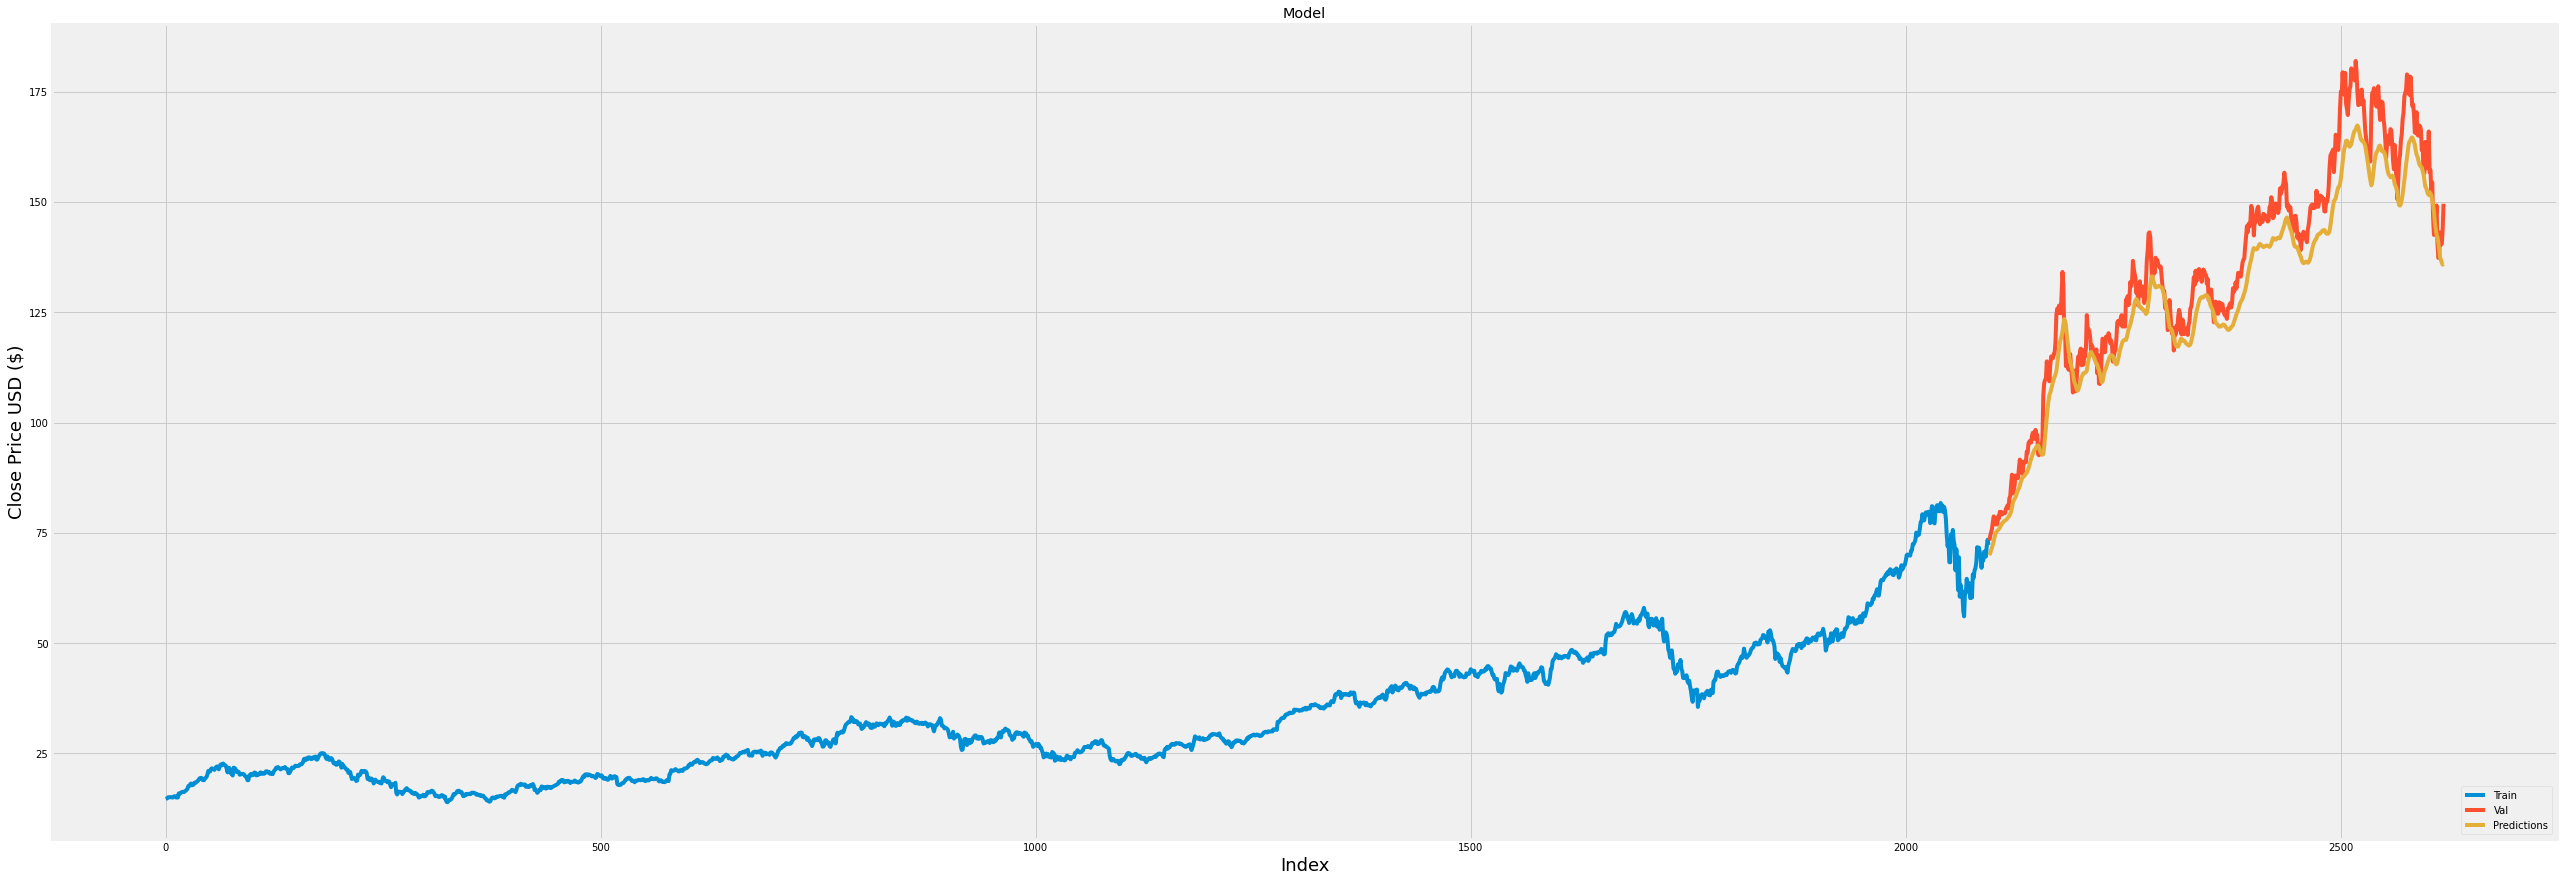

In [ ]:
# Plot the data
train = data[: training_data_len]
valid = data[training_data_len :  ]
valid['Predictions'] = predictions
# Visualise the Model
plt.figure(figsize=(40,15))
plt.title('Model')
plt.xlabel('Index',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
1602,47.044998,47.046753
1603,46.747501,47.168663
1604,46.577499,47.201923
1605,46.907501,47.164928
1606,46.790001,47.139435
...,...,...
1997,67.120003,66.792236
1998,67.692497,66.983017
1999,67.864998,67.233681
2000,68.787498,67.499420


In [ ]:
# Try and predict the closing price for future dates
# Get the quote
# Example taken below is of apple stocks

from google.colab import files
uploaded = files.upload()

Saving AAPL(2).csv to AAPL(2).csv


In [ ]:
df2 = pd.read_csv('AAPL(2).csv')
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2614,2022-05-23,137.789993,143.259995,137.649994,143.110001,143.110001,117726300
2615,2022-05-24,140.809998,141.970001,137.330002,140.360001,140.360001,104132700
2616,2022-05-25,138.429993,141.789993,138.339996,140.520004,140.520004,92482700
2617,2022-05-26,137.389999,144.339996,137.139999,143.779999,143.779999,90601500
2618,2022-05-27,145.389999,149.679993,145.259995,149.639999,149.639999,90978500


In [ ]:
# Create a new data frame
new_df = df2.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[130.1434]]


In [ ]:
df2['Close'].tail()
# As we see , there is discrepancy of 19 dollars between the prediction
# and the actual value

2614    143.110001
2615    140.360001
2616    140.520004
2617    143.779999
2618    149.639999
Name: Close, dtype: float64

In [ ]:
# Demonstrate the prediction for next 10 days

from numpy import array

lst_output = []
n_steps = 100
i = 0
while (i<30):
    if len()